<a href="https://colab.research.google.com/github/NaveenShetter1/Machine-Leaning-Notebooks/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
# Decision Tree classifier

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df=pd.read_csv('/content/bank.csv')

In [321]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [322]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [323]:
df.columns.value_counts()

,count
age,1
day,1
poutcome,1
previous,1
pdays,1
campaign,1
duration,1
month,1
contact,1
job,1


In [324]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [325]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [326]:
num_of_row=df.shape[0]

In [327]:
print(num_of_row)

11162


In [328]:
num_of_col=df.shape[1]

In [329]:
print(num_of_col)

17


In [330]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [331]:
# here doposite is the target col

In [332]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [333]:
y=df[['deposit']]

In [334]:
type(y)

pandas.core.frame.DataFrame

In [335]:
y.head()

,deposit
0,yes
1,yes
2,yes
3,yes
4,yes


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [337]:
# we need to use cat.codes so it will be easy to preprocess all the object columns

In [338]:
df['deposit']=df['deposit'].map({'yes':1,'no':0})

In [339]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [341]:
# import pandas as pd

# def preprocessing(df):
#     new_df = df.copy()

#     # Identify categorical columns
#     categorical_cols = new_df.select_dtypes(include=['object']).columns.tolist()

#     # Apply One-Hot Encoding
#     new_df = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)
#     new_df=new_df.map({True:1,False:0})

#     return new_df


In [342]:
def preprocessing(df):
  new_df=df.copy()
  for i in list(df.select_dtypes(include=['object']).columns):
    new_df[i]=new_df[i].astype('category')
    # new_df[i]=new_df[i].cat.codes
    new_df=pd.get_dummies(new_df,columns=[i],drop_first=True)
  return new_df

In [343]:
df_new=preprocessing(df)

In [344]:
df_new['job_entrepreneur'].value_counts()

,count
job_entrepreneur,
False,10834
True,328


In [345]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


In [346]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   deposit              11162 non-null  int64
 8   job_blue-collar      11162 non-null  bool 
 9   job_entrepreneur     11162 non-null  bool 
 10  job_housemaid        11162 non-null  bool 
 11  job_management       11162 non-null  bool 
 12  job_retired          11162 non-null  bool 
 13  job_self-employed    11162 non-null  bool 
 14  job_services         11162 non-null  bool 
 15  job_student          11162 non-null  bool 
 16  job_technician       1

In [347]:
def preprocessing(df):
  new_df=df.copy()
  for i in list(df.select_dtypes(include=['bool']).columns):
    new_df[i]=new_df[i].map({True:1,False:0})
  return new_df

In [348]:
df_new=preprocessing(df_new)

In [349]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [350]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   deposit              11162 non-null  int64
 8   job_blue-collar      11162 non-null  int64
 9   job_entrepreneur     11162 non-null  int64
 10  job_housemaid        11162 non-null  int64
 11  job_management       11162 non-null  int64
 12  job_retired          11162 non-null  int64
 13  job_self-employed    11162 non-null  int64
 14  job_services         11162 non-null  int64
 15  job_student          11162 non-null  int64
 16  job_technician       1

In [351]:
df_new.shape

(11162, 43)

In [352]:
x=df_new.drop(['deposit'],axis=1)

In [353]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [354]:
y=df_new['deposit']

In [355]:
y.head()

,deposit
0,1
1,1
2,1
3,1
4,1


In [356]:
from sklearn.model_selection import train_test_split

In [357]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [358]:
from sklearn.tree import DecisionTreeClassifier

In [359]:
dc=DecisionTreeClassifier()

dc.fit(x_train,y_train)

y_pred=dc.predict(x_test)

In [360]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [361]:
print('roc curve ', roc_auc_score(y_test,y_pred))

roc curve  0.792497038071829


In [362]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy score:  0.7931034482758621


In [363]:
print('classification report: ',classification_report(y_test,y_pred))

classification report:                precision    recall  f1-score   support

           0       0.80      0.81      0.80      1166
           1       0.79      0.78      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



plot confusion matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7eece5c1a7d0>


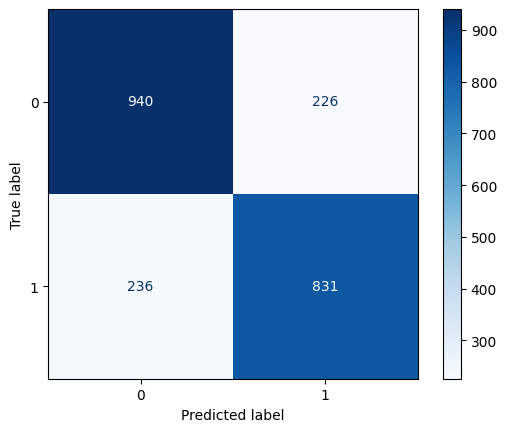

In [364]:
print('plot confusion matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues'))

In [365]:
dc_ent=DecisionTreeClassifier(criterion='entropy',max_depth=14,random_state=1)

dc_ent.fit(x_train,y_train)

y_pred=dc_ent.predict(x_test)

In [366]:
print('Accuracy score for entropy : ',accuracy_score(y_test,y_pred))

Accuracy score for entropy :  0.8145991939095387


In [367]:
# so here we have multiple parameters like max_depth, criterion, number of nodes ext for that we will use gridsearchcv a hyperparameter tuning technique to give good parameters to select

In [368]:
print('roc curve ', roc_auc_score(y_test,y_pred))

roc curve  0.8155470283460946


In [369]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy score:  0.8145991939095387


In [370]:
print('classification report: ',classification_report(y_test,y_pred))

classification report:                precision    recall  f1-score   support

           0       0.84      0.79      0.82      1166
           1       0.79      0.84      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.82      0.81      2233
weighted avg       0.82      0.81      0.81      2233



plot confusion matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7eece5685d50>


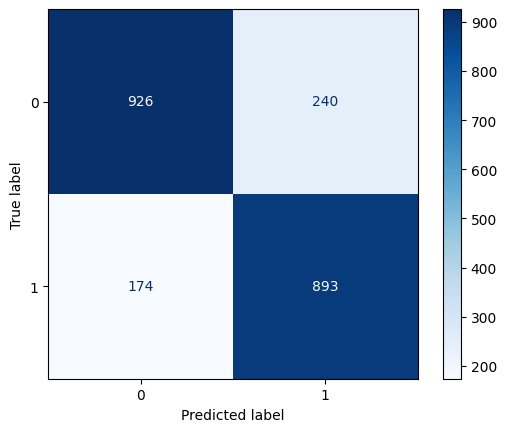

In [371]:
print('plot confusion matrix: ',ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot(cmap='Blues'))

In [372]:
# visualizing the tree

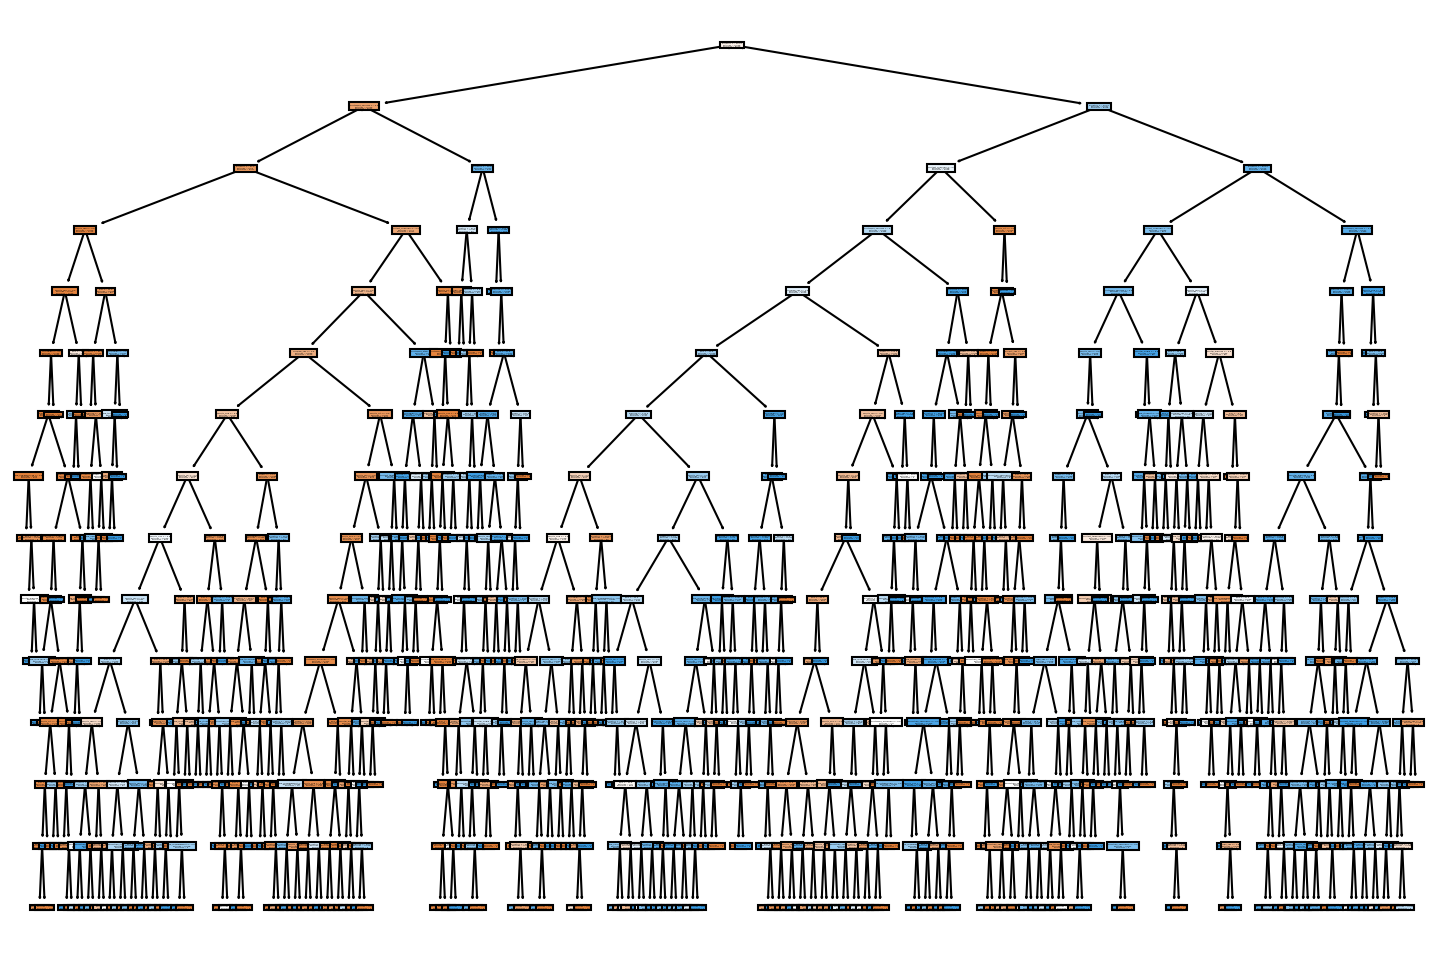

In [373]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dc_ent,filled=True,feature_names=x.columns)
plt.show()

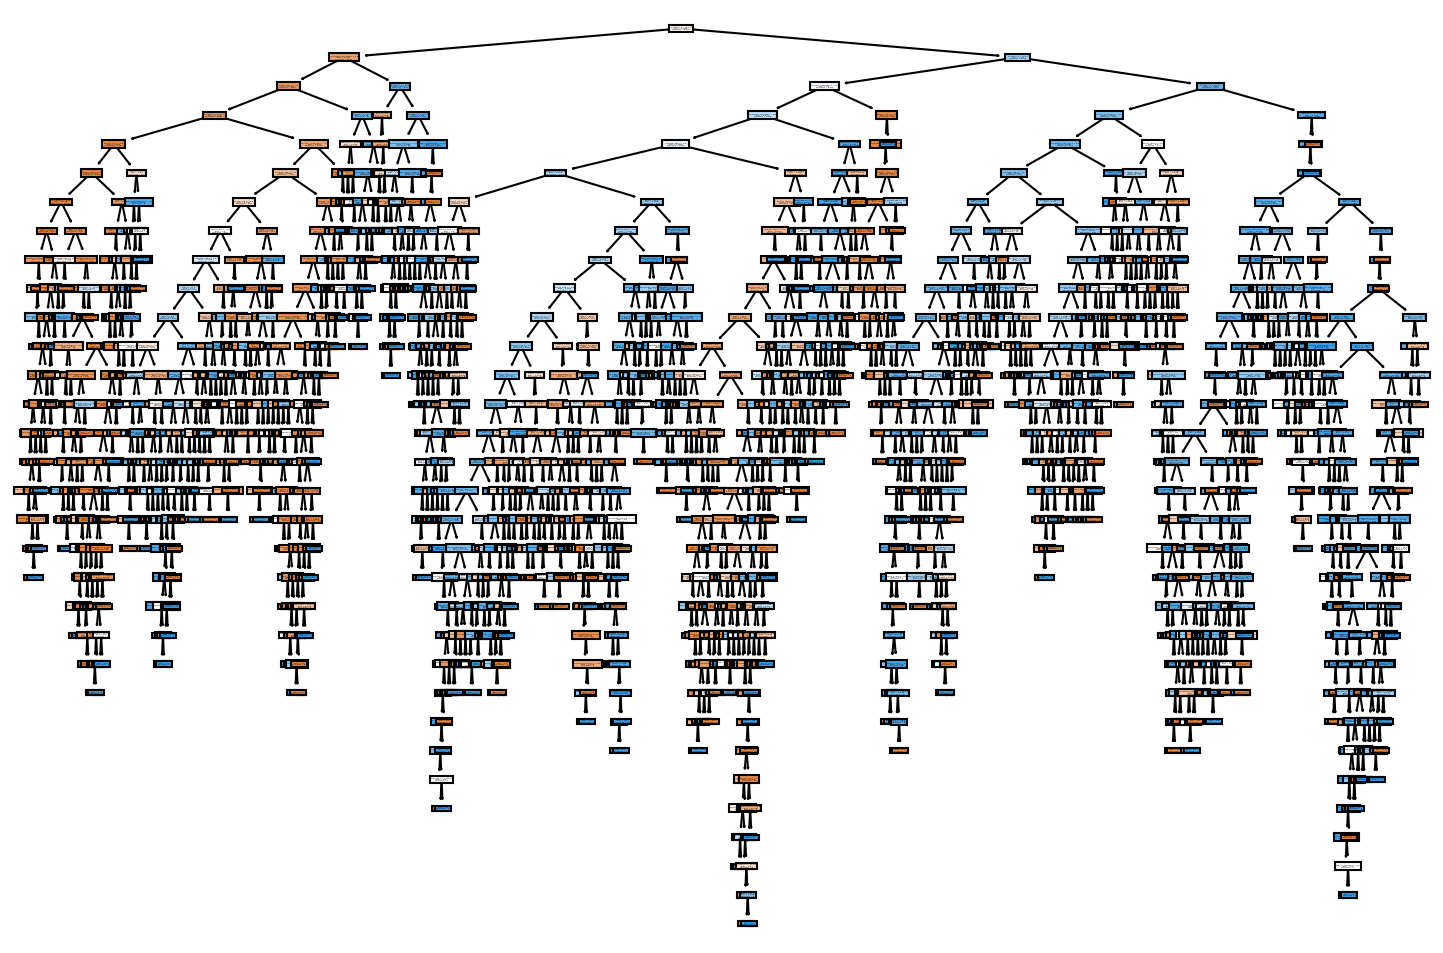

In [374]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dc,filled=True,feature_names=x.columns)
plt.show()